In [2]:
#Add install methods
#! py -m pip install -q "datasets==2.15.0"
#! py -m pip install peft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Open meteo
import openmeteo_requests as mto


<method-wrapper '__init__' of module object at 0x000001A6BA24E6B0>

In [3]:
#Get dataset
#Load dataset

#df = pd.read_csv()

#df = pd.read_csv("test.csv")
#df.dropna(inplace=True)
#df = pd.read_csv("test.csv", index_col="latitude")


df = pd.read_csv("test.csv", skiprows=2)
df.dropna(inplace=True)


# Filter out for just temperature data
#temperature_data = df[['time', 'temperature_2m (Â°C)']]

In [4]:
df

,time,temperature_2m (°C)
0,2024-10-20T00:00,21.4
1,2024-10-20T01:00,21.3
2,2024-10-20T02:00,20.8
3,2024-10-20T03:00,20.0
4,2024-10-20T04:00,19.2
...,...,...
355,2024-11-03T19:00,19.9
356,2024-11-03T20:00,20.8
357,2024-11-03T21:00,21.4
358,2024-11-03T22:00,20.7


<Axes: >

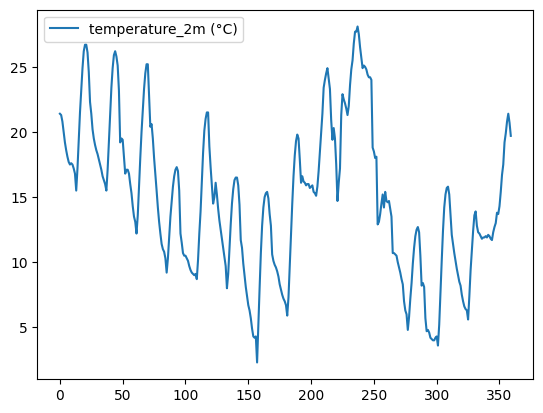

In [34]:
df.plot()

In [7]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

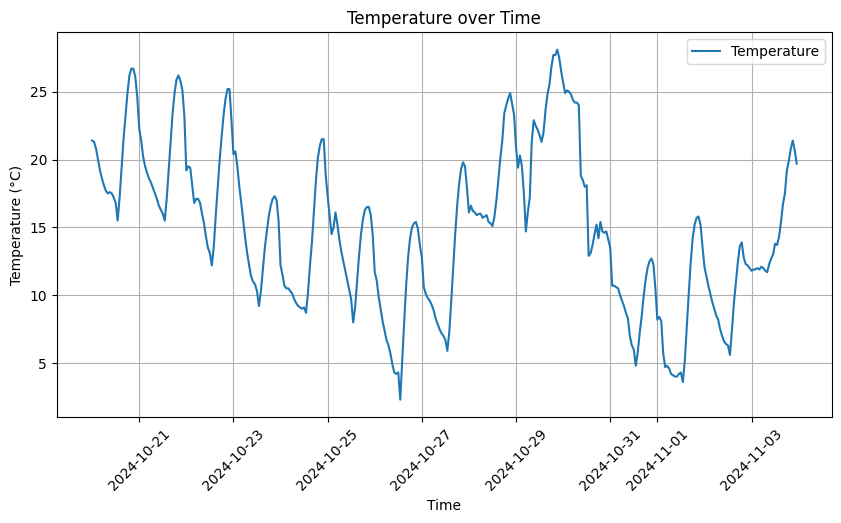

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['temperature_2m (°C)'], label='Temperature')
plt.title('Temperature over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [11]:
df['temp_lag_1'] = df['temperature_2m (°C)'].shift(1)
df['temp_lag_24'] = df['temperature_2m (°C)'].shift(24)

In [ ]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df = df.dropna()

C:\Users\bobby\AppData\Local\Temp\ipykernel_35512\3919095336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\bobby\AppData\Local\Temp\ipykernel_35512\3919095336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek


,temperature_2m (°C),temp_lag_1,temp_lag_24,hour,dayofweek
time,,,,,
2024-10-21 00:00:00,22.3,24.6,21.4,0,0
2024-10-21 01:00:00,21.4,22.3,21.3,1,0
2024-10-21 02:00:00,20.2,21.4,20.8,2,0
2024-10-21 03:00:00,19.5,20.2,20.0,3,0
2024-10-21 04:00:00,19.0,19.5,19.2,4,0
...,...,...,...,...,...
2024-11-03 19:00:00,19.9,19.2,13.9,19,6
2024-11-03 20:00:00,20.8,19.9,12.8,20,6
2024-11-03 21:00:00,21.4,20.8,12.3,21,6


In [15]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

X_train = train[['temp_lag_1', 'temp_lag_24', 'hour', 'dayofweek']]
y_train = train['temperature_2m (°C)']
X_test = test[['temp_lag_1', 'temp_lag_24', 'hour', 'dayofweek']]
y_test = test['temperature_2m (°C)']

In [ ]:
model = LinearRegression()


model.fit(X_train, y_train) #This trains the model


y_pred = model.predict(X_test) # This makes predictions


from sklearn.metrics import mean_squared_error, r2_score #Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8418252492507087
R-squared: 0.9601924055652576


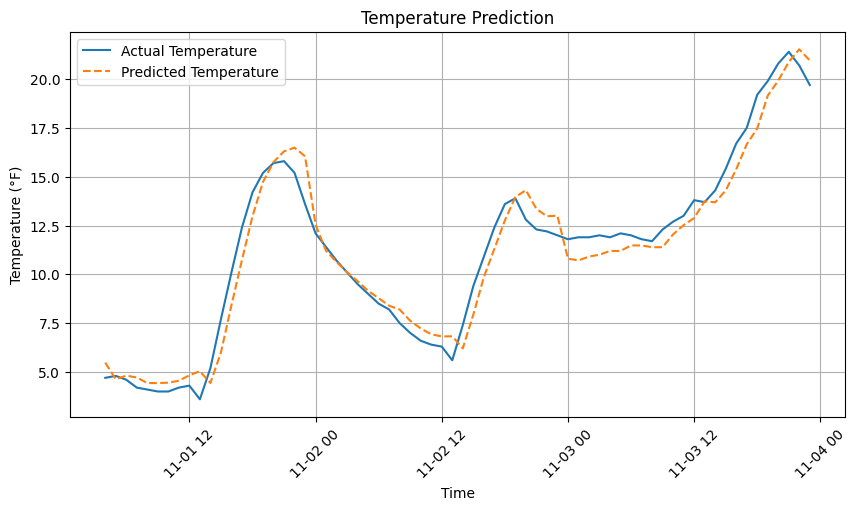

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, y_test, label='Actual Temperature')
plt.plot(test.index, y_pred, label='Predicted Temperature', linestyle='--')
plt.title('Temperature Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature (°F)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [19]:
#df_train, df_test = train_test_split(df, test_size=0.1, random_state=None, stratify=None)
# Def change this ^
#modelSet = LinearRegression()
#modelSet.fit(df_train, df_test)